In [2]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
os.chdir("/home/jok120/protein-transformer//")
from protein_transformer.losses import inverse_trig_transform
%matplotlib inline
sns.set_style("darkgrid")


# Load True and Predicted Angles

In [7]:
!pwd

/home/jok120/protein-transformer


In [8]:
train_data = torch.load("data/proteinnet/casp12_191216_100.pt")
train_angles_sincos = np.concatenate(train_data["train"]["ang"])
train_angles_sincos.shape

(20395203, 24)

In [10]:
train_angles_sincos[np.where(np.isnan(train_angles_sincos))] = 0

ValueError: setting an array element with a sequence.

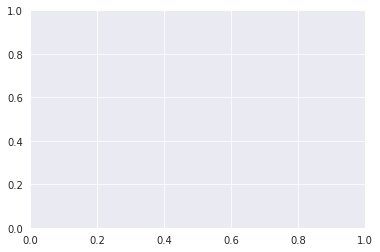

In [12]:
plt.plot(np.histogram(train_angles_sincos))

In [58]:
def numpy_inverse_trig(arr):
    return inverse_trig_transform(torch.tensor(np.expand_dims(arr, axis=0))).numpy()[0]

In [59]:
train_angles = numpy_inverse_trig(train_angles_sincos)
train_angles.shape

(544, 12)

In [122]:
n = np.concatenate([np.load(f) for f in glob("coords/0531-hp-20531-q1-049/*.npy") if "l0.00" not in f])
# rows_subset = np.random.choice(np.arange(n.shape[0]), size=300)
# n = n[rows_subset]
ninv = numpy_inverse_trig(n)
n.shape, ninv.shape

((544, 24), (544, 12))

# Plot angle distributions

## Single plot versions

In [63]:
def do_plot(arr, is_pred=False, labels=["phi", "psi", "omega"], xlim=(-4,4), start_idx=0):
    a, b = arr[:,start_idx+0], arr[:,start_idx+1]
    a = a[~np.isnan(a)]
    b = b[~np.isnan(b)]
#     sns.distplot(np.arctan2(a, b), label=labels[0][4:8])
    sns.distplot(a, label=labels[0])
    sns.distplot(b, label=labels[1])
    plt.plot([a.mean(), a.mean()], [0, 5], color="purple")
    plt.plot([b.mean(), b.mean()], [0, 5], color="red")
    plt.title("True Angle Distribution")
    if is_pred:
        plt.title("Predicted Angle Distribution")
    plt.legend()
    if xlim:
        plt.xlim(*xlim)

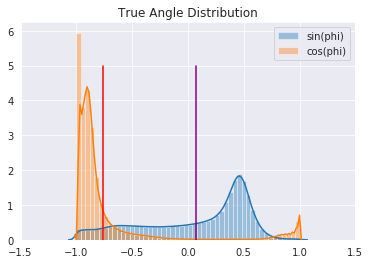

In [64]:
do_plot(train_angles_sincos, labels=["sin(phi)", "cos(phi)"], xlim=(-1.5, 1.5))

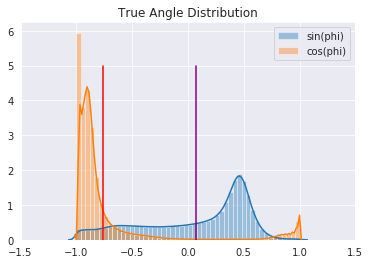

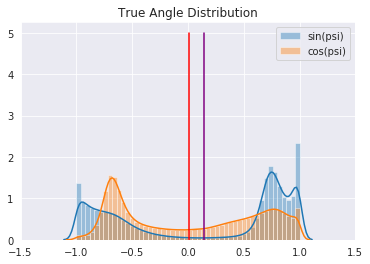

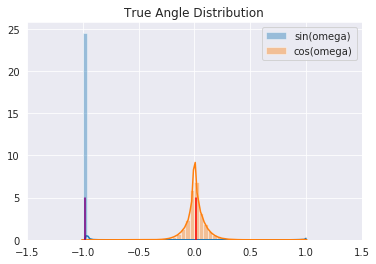

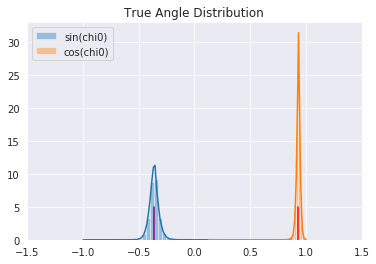

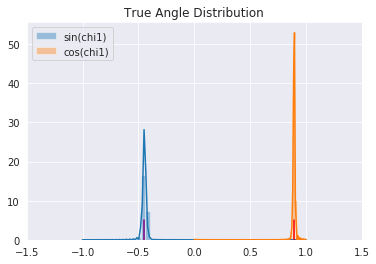

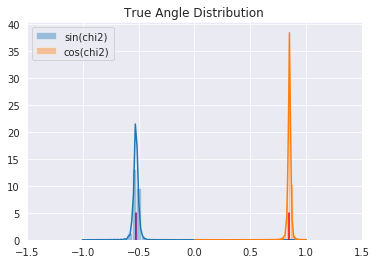

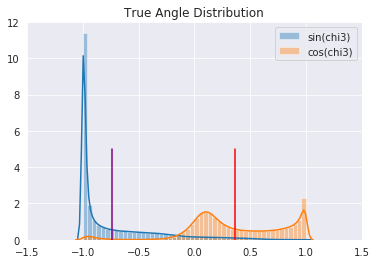

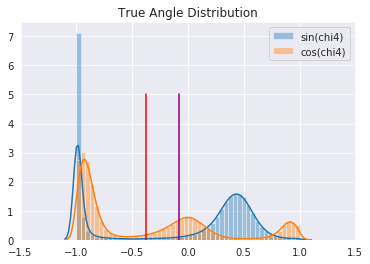

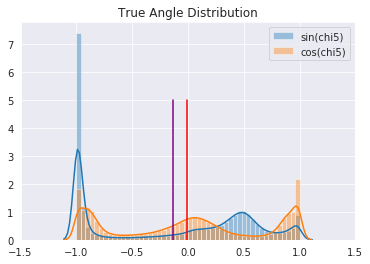

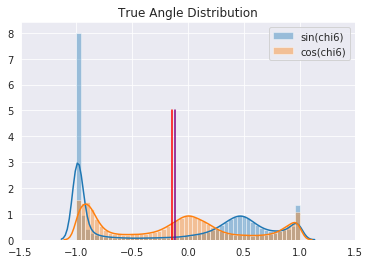

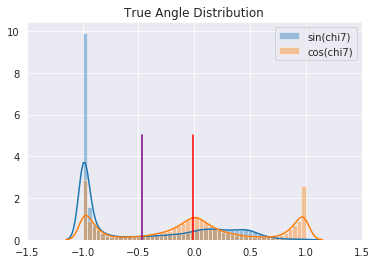

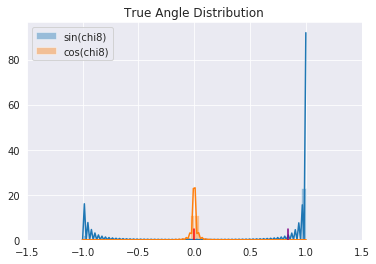

In [66]:
i = 0
for ang_name in ["phi", "psi", "omega"] + ["chi" + str(idx) for idx in range(0,9)]:
    do_plot(train_angles_sincos, labels=[f"sin({ang_name})", f"cos({ang_name})"], xlim=(-1.5, 1.5), start_idx=i)
    i += 2
    plt.show()


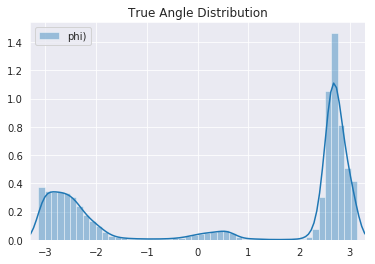

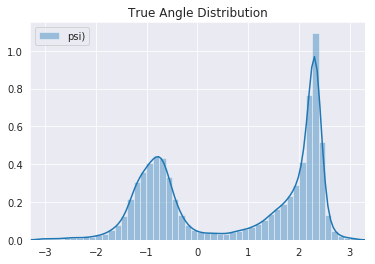

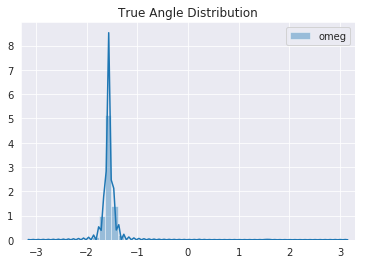

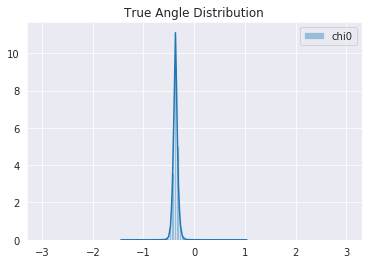

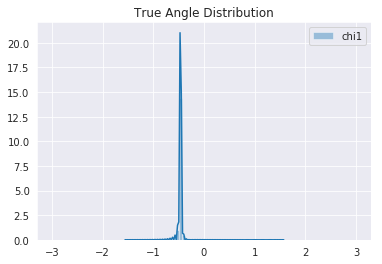

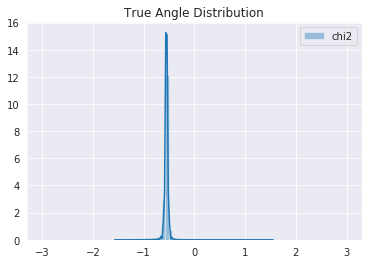

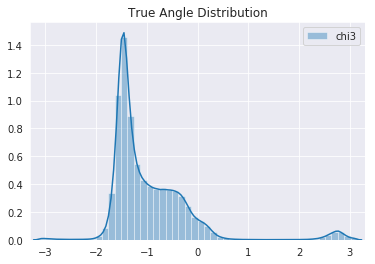

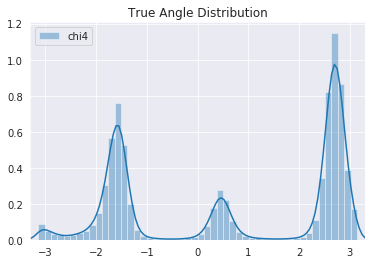

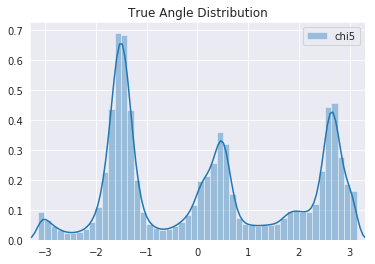

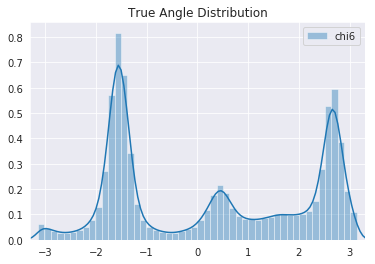

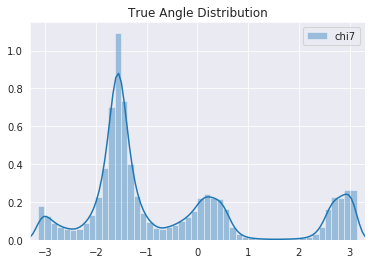

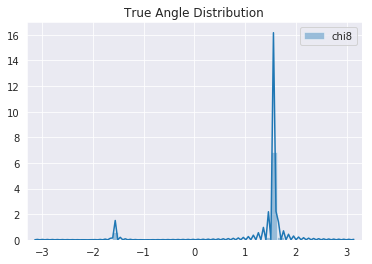

In [60]:
i = 0
for ang_name in ["phi", "psi", "omega"] + ["chi" + str(idx) for idx in range(0,9)]:
    do_plot(train_angles_sincos, labels=[f"sin({ang_name})", f"cos({ang_name})"], xlim=(-3.3, 3.3), start_idx=i)
    i += 2
    plt.show()


In [45]:
new_means = np.nanmean(train_angles_sincos, axis=0)
new_means

array([ 7.59581100e-02, -7.57467695e-01,  1.45566831e-01,  8.28046215e-03,
       -9.83265764e-01,  1.23654607e-02, -3.60997316e-01,  9.31371960e-01,
       -4.47183203e-01,  8.93392874e-01, -5.23712722e-01,  8.50476180e-01,
       -7.34393907e-01,  3.66055637e-01, -8.40664399e-02, -3.73929880e-01,
       -1.34462327e-01, -9.97296648e-03, -1.16659455e-01, -1.39964029e-01,
       -4.64785385e-01, -6.56154753e-03,  8.39806484e-01, -1.69774453e-05])

In [49]:
np.save("data/proteinnet/casp12_190809_30xsmall_mean.npy", new_means)

In [42]:
means = np.load("protein/190602_query4_mean.npy")

In [47]:
np.sqrt(np.mean((new_means - means)**2))

0.3130463058099288

In [98]:
just_means = np.tile(new_means,(4944235, 1))
just_means[np.isnan(train_angles_sincos)] = 0
train_angles_sincos_nonan = train_angles_sincos.copy()
train_angles_sincos_nonan[np.isnan(train_angles_sincos)] = 0

In [99]:
def rmse(a, b):
    assert a.shape == b.shape
    return np.sqrt(((a-b)**2).sum()/a.shape[0])

rmse(just_means[just_means != 0], train_angles_sincos_nonan[train_angles_sincos_nonan != 0])

0.44729946993744796

In [101]:
mses = ((just_means[just_means != 0] - train_angles_sincos_nonan[train_angles_sincos_nonan != 0])**2).flatten()

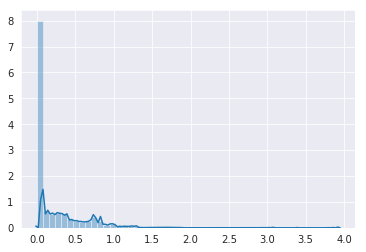

In [102]:
sns.distplot(mses)

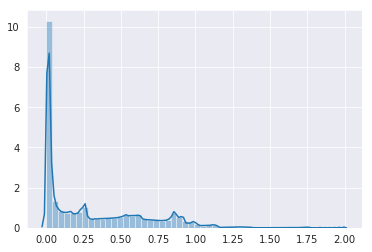

In [103]:
sns.distplot(np.sqrt(mses))

# Old stuff

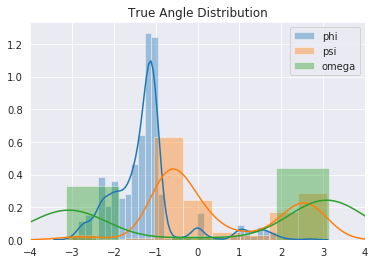

In [125]:
do_plot(train_angles)

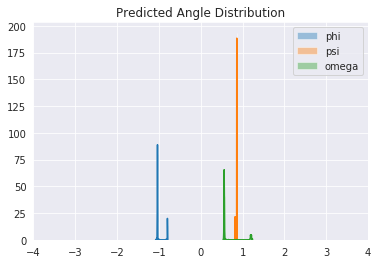

In [126]:
do_plot(ninv, True)

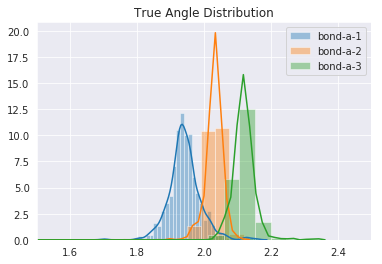

In [113]:
do_plot(train_angles[:,3:], labels=["bond-a-1", "bond-a-2", "bond-a-3"], xlim=(1.5, 2.5))

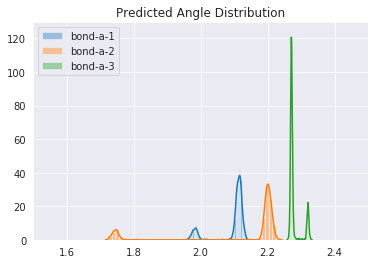

In [115]:
do_plot(ninv[:,3:], is_pred=True, labels=["bond-a-1", "bond-a-2", "bond-a-3"],
        xlim=(1.5, 2.5))

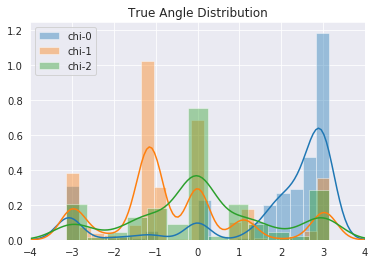

In [129]:
do_plot(train_angles[:,6:], labels=["chi-0", "chi-1", "chi-2"])

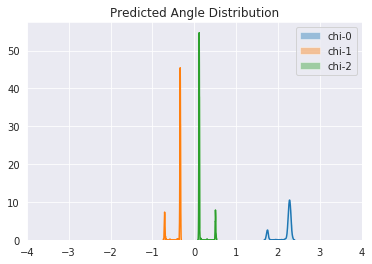

In [130]:
do_plot(ninv[:,6:], labels=["chi-0", "chi-1", "chi-2"], is_pred=True)

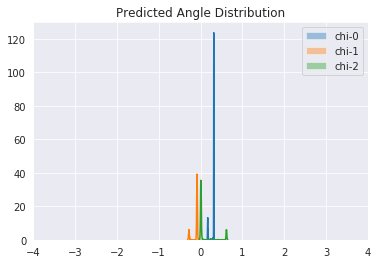

In [193]:
do_plot(ninv[:,9:], labels=["chi-0", "chi-1", "chi-2"], is_pred=True)

## Double Plot Versions

In [354]:
fs = plt.rcParams.get('figure.figsize')
print(fs)
scaleup = 2
[_ * (1+scaleup) for _ in fs]

[10.2, 6.8]


[30.599999999999998, 20.4]

In [288]:
plt.rcParams['figure.figsize'] = [30.6, 20.4]#[10.2, 6.8]#[7.2, 4.8]
plt.rcParams.update({'font.size': 13})

In [349]:
def do_double_plot(tarr, parr, labels=["$\phi$", "$\psi$", "$\omega$"], xlim=(-4,4),
                   ylims=((10,30),(0,5)), kde=True):
    f, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1,3]})
    if xlim:
        plt.xlim(*xlim)
    ax3 = f.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax3.grid(False)
    bins = np.linspace(xlim[0], xlim[1], 55)
    sns.distplot(tarr[:,0], label="true " + labels[0], ax=ax, kde=kde, bins=bins)
    sns.distplot(tarr[:,0], label="true " + labels[0], ax=ax2, kde=kde, bins=bins)
    sns.distplot(parr[:,0], label="pred " + labels[0], ax=ax, kde=kde, bins=bins)
    sns.distplot(parr[:,0], label="pred " + labels[0], ax=ax2, kde=kde, bins=bins)
    sns.distplot(tarr[:,1], label="true " + labels[1], ax=ax, kde=kde, bins=bins)
    sns.distplot(tarr[:,1], label="true " + labels[1], ax=ax2, kde=kde, bins=bins)
    sns.distplot(parr[:,1], label="pred " + labels[1], ax=ax, kde=kde, bins=bins)
    sns.distplot(parr[:,1], label="pred " + labels[1], ax=ax2, kde=kde, bins=bins)
    sns.distplot(tarr[:,2], label="true " + labels[2], ax=ax, kde=kde, bins=bins)
    sns.distplot(tarr[:,2], label="true " + labels[2], ax=ax2, kde=kde, bins=bins ) 
    sns.distplot(parr[:,2], label="pred " + labels[2], ax=ax, kde=kde, bins=bins)
    sns.distplot(parr[:,2], label="pred " + labels[2], ax=ax2, kde=kde, bins=bins)
    , kde=kde
    ax.set_ylim(*ylims[0])
    ax2.set_ylim(*ylims[1])
    ax.spines['bottom'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    ax.set_title("Angle Distribution Comparison")
#     ax2.legend()
    ax2.legend(loc=(1.04,.9))
    
    d = .015  # how big to make the diagonal lines in axes coordinates
    kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
    ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
    ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
    ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal
    plt.xlabel("Value in Radians")
    plt.ylabel("Count")
    ax3.yaxis.set_label_coords(-.06,0.54)


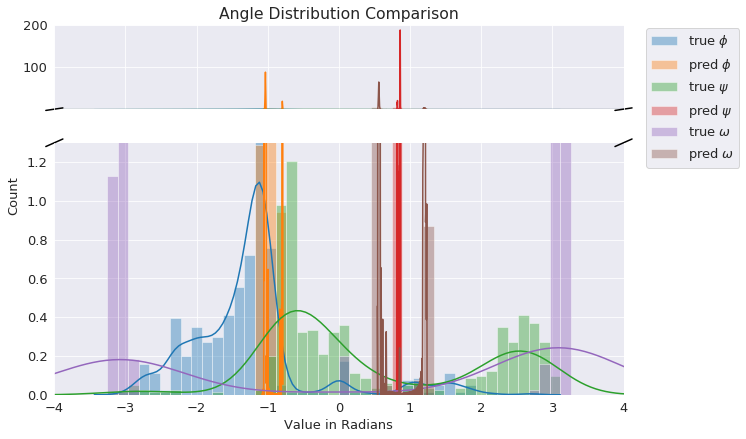

In [350]:
do_double_plot(train_angles, ninv, ylims=((1.3,200),(0,1.3)))

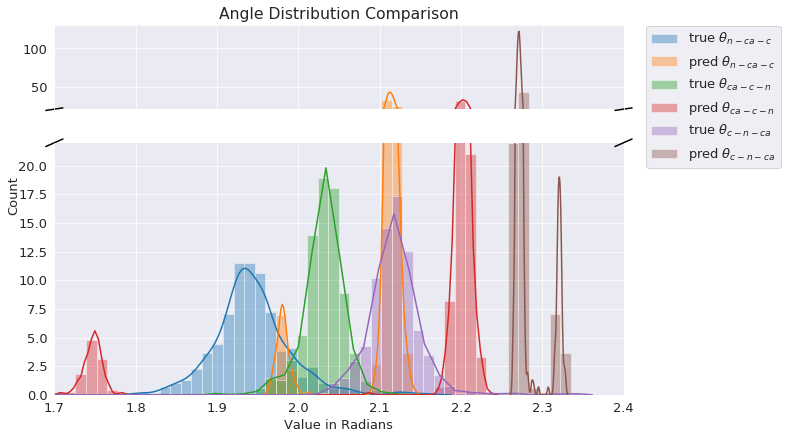

In [351]:
do_double_plot(train_angles[:,3:], ninv[:,3:], ylims=((22,130),(0,22)), 
               labels=[r"${\theta}_{n-ca-c}$", 
                       r"${\theta}_{ca-c-n}$", 
                       r"${\theta}_{c-n-ca}$"], xlim=(1.7, 2.4))

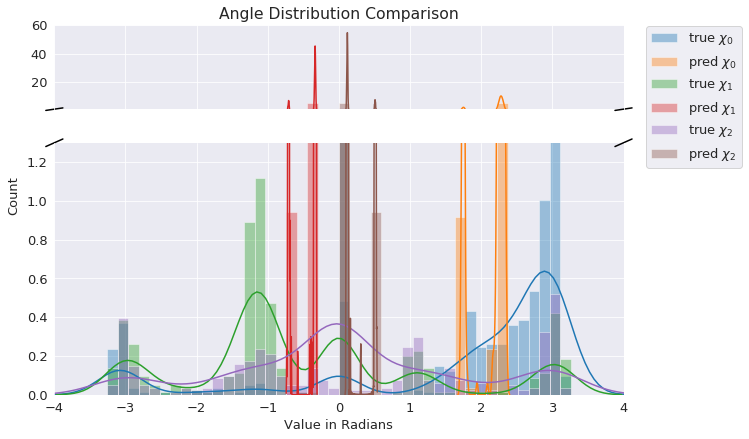

In [352]:
do_double_plot(train_angles[:,6:], ninv[:,6:], ylims=((1.3,60),(0,1.3)),
               labels=["$\chi_0$", "$\chi_1$", "$\chi_2$"])

In [79]:
print( "          True,  Pred")
for i in range(12):
    pred_mean = ninv[:,i].mean()
    true_mean = train_angles[:,i].mean()
    print(f"Angle {i: >2}: {true_mean:+.3f} {pred_mean:+.3f}")

          True,  Pred
Angle  0: -1.237 -0.998
Angle  1: +0.451 +0.855
Angle  2: +0.432 +0.659
Angle  3: +1.943 +2.094
Angle  4: +1.979 +2.133
Angle  5: +2.064 +2.279
Angle  6: +1.714 +2.194
Angle  7: -0.475 -0.393
Angle  8: +0.096 +0.178
Angle  9: +0.060 +0.293
Angle 10: -0.032 -0.115
Angle 11: +0.004 +0.101
